In [71]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from getdata import netflix_df

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [72]:
# Variables
min_rating = 7

condensed_df = netflix_df.loc[netflix_df["imdb_score"] >= min_rating]
condensed_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,73424.0,17.617,8.306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5830,ts288861,Let's Eat,SHOW,A food-blogging insurance agent encounters a f...,2021,TV-14,60,"['drama', 'comedy']",['TH'],1.0,tt15978704,8.2,5.0,2.334,NaN
5839,tm1165179,Kongsi Raya,MOVIE,Jack - a Chinese chef-manager who is in-line t...,2022,NaN,102,['comedy'],['MY'],NaN,tt16806990,7.0,66.0,2.112,NaN
5841,tm985215,Princess 'Daya'Reese,MOVIE,Reese is a con artist from Manila who dreams o...,2021,NaN,115,"['comedy', 'romance']",['PH'],NaN,tt13399802,7.1,50.0,1.383,NaN
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,tt11803618,7.7,348.0,NaN,NaN


In [73]:
def makeList(string):
    # re.sub() function taken from StackOverflow: https://stackoverflow.com/questions/34860982/replace-the-punctuation-with-whitespace
    clean = re.sub(r"[\[\]\' ]+\ *", "", string)
    clean2 = re.sub(r",", " ", clean)
    if clean2 == "":
        return []
    else:
        return list(clean2.split(" "))

In [74]:
genre_data = []

for index, row in condensed_df.iterrows():
    genre_list = makeList(row["genres"])

    for genre in genre_list:
        # Add genre to global genre list, then to its respective type list
        if(row["type"] == "MOVIE"):
            if(not any(g["word"] == genre for g in genre_data)):
                genre_data.append({"word": genre, "total": 1, "movies": 1, "shows": 0})
            else:
                genre_data[next((index for (index, g) in enumerate(genre_data) if g["word"] == genre), None)]["total"] += 1
                genre_data[next((index for (index, g) in enumerate(genre_data) if g["word"] == genre), None)]["movies"] += 1
        else:
            if(not any(g["word"] == genre for g in genre_data)):
                genre_data.append({"word": genre, "total": 1, "movies": 0, "shows": 1})
            else:
                genre_data[next((index for (index, g) in enumerate(genre_data) if g["word"] == genre), None)]["total"] += 1
                genre_data[next((index for (index, g) in enumerate(genre_data) if g["word"] == genre), None)]["shows"] += 1

genre_data

[{'word': 'drama', 'total': 1193, 'movies': 534, 'shows': 659},
 {'word': 'crime', 'total': 388, 'movies': 145, 'shows': 243},
 {'word': 'action', 'total': 374, 'movies': 149, 'shows': 225},
 {'word': 'thriller', 'total': 387, 'movies': 151, 'shows': 236},
 {'word': 'european', 'total': 159, 'movies': 86, 'shows': 73},
 {'word': 'fantasy', 'total': 240, 'movies': 68, 'shows': 172},
 {'word': 'comedy', 'total': 768, 'movies': 368, 'shows': 400},
 {'word': 'war', 'total': 99, 'movies': 51, 'shows': 48},
 {'word': 'western', 'total': 14, 'movies': 7, 'shows': 7},
 {'word': 'documentation', 'total': 502, 'movies': 295, 'shows': 207},
 {'word': 'romance', 'total': 319, 'movies': 144, 'shows': 175},
 {'word': 'history', 'total': 164, 'movies': 77, 'shows': 87},
 {'word': 'music', 'total': 90, 'movies': 57, 'shows': 33},
 {'word': 'horror', 'total': 89, 'movies': 28, 'shows': 61},
 {'word': 'family', 'total': 203, 'movies': 68, 'shows': 135},
 {'word': 'animation', 'total': 267, 'movies': 69,

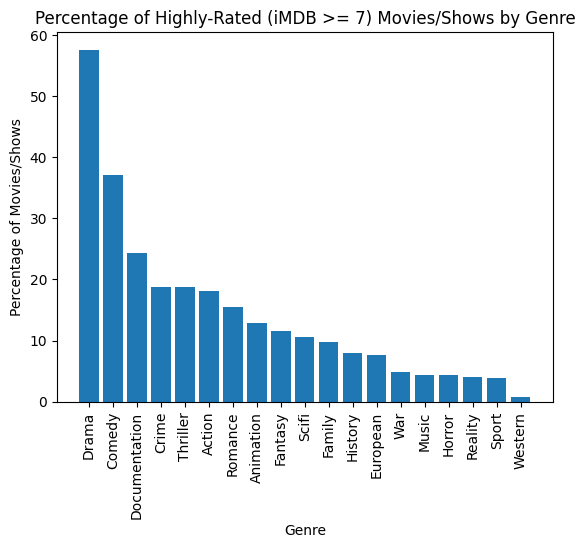

In [75]:
# Sort data by total
# sorted() function taken from StackOverflow: https://stackoverflow.com/questions/72899/how-to-sort-a-list-of-dictionaries-by-a-value-of-the-dictionary-in-python
sorted_total_data = sorted(genre_data, key=lambda x: x["total"], reverse=True)

total_movies = condensed_df["type"].value_counts()["MOVIE"]
total_shows = condensed_df["type"].value_counts()["SHOW"]
total = total_movies + total_shows

# Total Genre Percentages
genres = [g["word"].capitalize() for g in sorted_total_data]
x_axis = np.arange(len(genres))
counts = [(g["total"] / total) * 100 for g in sorted_total_data]
plt.bar(x_axis, counts)
plt.xticks(x_axis, genres, rotation=90)
plt.title(f"Percentage of Highly-Rated (iMDB >= {min_rating}) Movies/Shows by Genre")
plt.xlabel("Genre")
plt.ylabel("Percentage of Movies/Shows")
plt.show()

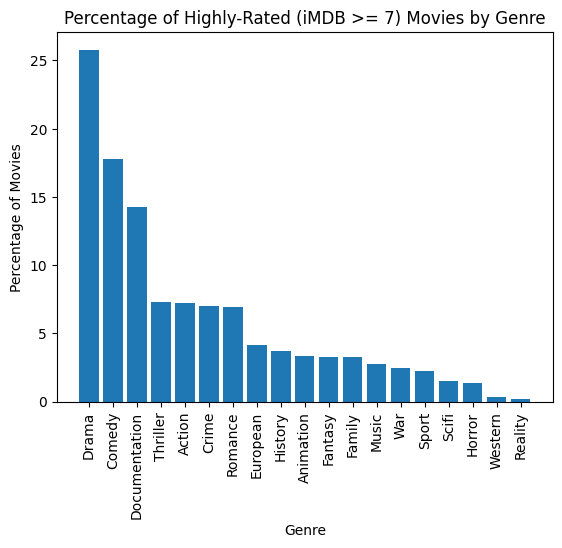

In [76]:
# Sort data by movies
# sorted() function taken from StackOverflow: https://stackoverflow.com/questions/72899/how-to-sort-a-list-of-dictionaries-by-a-value-of-the-dictionary-in-python
sorted_movie_data = sorted(genre_data, key=lambda x: x["movies"], reverse=True)

# Total Movie Percentages
genres = [g["word"].capitalize() for g in sorted_movie_data]
x_axis = np.arange(len(genres))
counts = [(g["movies"] / total) * 100 for g in sorted_movie_data]
plt.bar(x_axis, counts)
plt.xticks(x_axis, genres, rotation=90)
plt.title(f"Percentage of Highly-Rated (iMDB >= {min_rating}) Movies by Genre")
plt.xlabel("Genre")
plt.ylabel("Percentage of Movies")
plt.show()

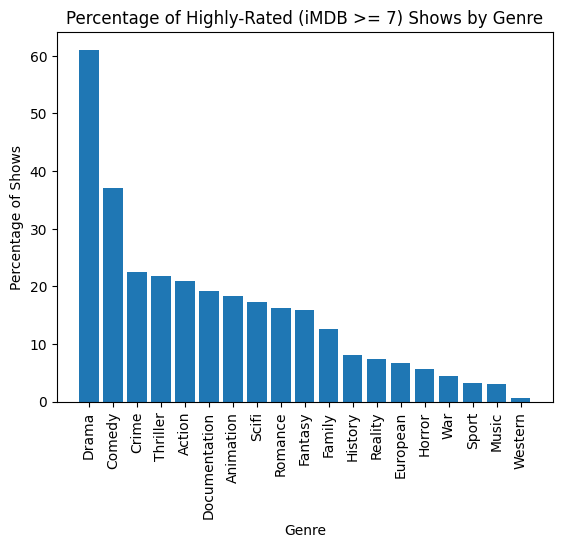

In [77]:
# Sort data by shows
# sorted() function taken from StackOverflow: https://stackoverflow.com/questions/72899/how-to-sort-a-list-of-dictionaries-by-a-value-of-the-dictionary-in-python
sorted_show_data = sorted(genre_data, key=lambda x: x["shows"], reverse=True)

# Show Genres
genres = [g["word"].capitalize() for g in sorted_show_data]
x_axis = np.arange(len(genres))
counts = [(g["shows"] / total_shows) * 100 for g in sorted_show_data]
plt.bar(x_axis, counts)
plt.xticks(x_axis, genres, rotation=90)
plt.title(f"Percentage of Highly-Rated (iMDB >= {min_rating}) Shows by Genre")
plt.xlabel("Genre")
plt.ylabel("Percentage of Shows")
plt.show()

In [97]:
# Movies and Shows Combined

# Create copy of condensed DataFrame and add new column
total_group_df = condensed_df.copy()
total_group_df["Popular Genres"] = ""

# List of genres we're searching for
popular_genres = ["action", "comedy", "crime", "drama", "documentation", "thriller"]

# Iterate over all movies/shows
for index, row in total_group_df.iterrows():
    # Turn the genres string into a sorted list
    genre_list = makeList(row["genres"])
    genre_list.sort()

    # Variables
    contains_genre = False
    popular_genres_string = ""

    # Iterate over genres we're searching for
    # If it exists, add it to string
    for genre in popular_genres:
        if genre in genre_list:
            popular_genres_string = popular_genres_string + genre + " / "
            contains_genre = True
    
    # Remove " / " at end of string
    popular_genres_string = popular_genres_string[:-3]
    
    # If exactly 2 genres were found in the list, add them to the new column
    # Otherwise, drop the row
    if contains_genre:
        if(popular_genres_string.count("/") == 0 or popular_genres_string.count("/") > 1):
            total_group_df.drop(index, inplace=True)
        else:
            total_group_df.at[index, "Popular Genres"] = popular_genres_string
    else:
        total_group_df.drop(index, inplace=True)


total_group_df.head()


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,Popular Genres
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,crime / drama
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811,action / comedy
10,tm44204,The Guns of Navarone,MOVIE,A team of allied saboteurs are assigned an imp...,1961,NaN,158,"['action', 'drama', 'war']","['GB', 'US']",NaN,tt0054953,7.5,50748.0,13.844,7.300,action / drama
12,tm69997,Richard Pryor: Live in Concert,MOVIE,"Richard Pryor delivers monologues on race, sex...",1979,R,78,"['comedy', 'documentation']",['US'],NaN,tt0079807,8.1,5141.0,4.718,7.500,comedy / documentation
20,tm27298,Saladin the Victorious,MOVIE,"Saladin, the first sultan of Egypt and Syria, ...",1963,NaN,186,"['action', 'drama', 'war', 'history', 'romance']",['EG'],NaN,tt0057357,7.6,2508.0,4.156,7.100,action / drama


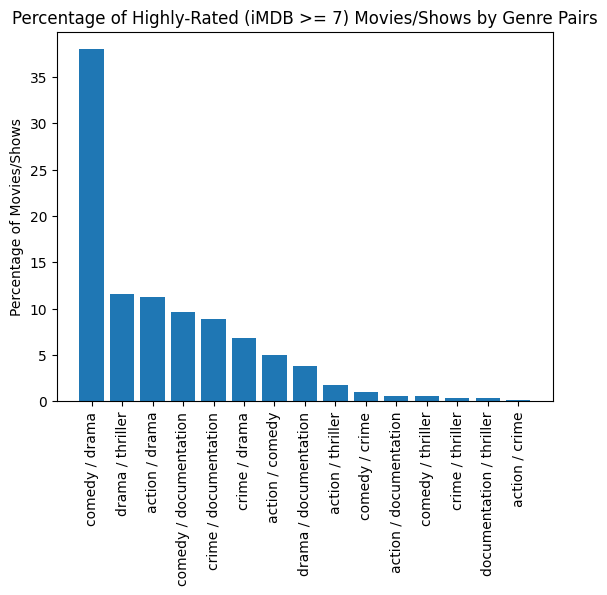

In [96]:
# Set x-axis
sorted_genre_groups = total_group_df.groupby(["Popular Genres"]).size().sort_values(ascending=False)
x_axis = np.arange(len(sorted_genre_groups))

# Set y-axis
genre_sum = sorted_genre_groups.sum()
y_axis = [(g / genre_sum) * 100 for g in sorted_genre_groups]

# Create bar plot
plt.bar(x_axis, y_axis)
plt.xticks(x_axis, sorted_genre_groups.index, rotation=90)
plt.title(f"Percentage of Highly-Rated (iMDB >= {min_rating}) Movies/Shows by Genre Pairs")
plt.ylabel("Percentage of Movies/Shows")
plt.show()